# MORTGAGE BACKED SECURITIES

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

LOADING DATA

In [2]:
df=pd.read_csv('loan_export.csv')

C:\Users\hp\AppData\Local\Temp\ipykernel_8628\3595142520.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('loan_export.csv')


In [3]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


EDA

In [4]:
df.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [6]:
print(df.isnull().sum().sort_values(ascending=False),"\n\n",df.isnull().sum()/df.shape[0] *100)

SellerName            24994
CreditScore               0
FirstPaymentDate          0
MonthsDelinquent          0
EverDelinquent            0
ServicerName              0
NumBorrowers              0
OrigLoanTerm              0
LoanPurpose               0
LoanSeqNum                0
PostalCode                0
PropertyType              0
PropertyState             0
ProductType               0
PPM                       0
Channel                   0
OrigInterestRate          0
LTV                       0
OrigUPB                   0
DTI                       0
OCLTV                     0
Occupancy                 0
Units                     0
MIP                       0
MSA                       0
MaturityDate              0
FirstTimeHomebuyer        0
MonthsInRepayment         0
dtype: int64 

 CreditScore           0.000000
FirstPaymentDate      0.000000
FirstTimeHomebuyer    0.000000
MaturityDate          0.000000
MSA                   0.000000
MIP                   0.000000
Units         

In [7]:
df['SellerName'].mode().values[0]

'Ot'

In [8]:
df['SellerName'] = df['SellerName'].fillna(df['SellerName'].dropna().mode().values[0])

In [9]:
df['SellerName'].isnull().sum()

0

In [10]:
df["MSA"].unique()

array(['16974', '19740', '29940', '31084', '35644', 'X    ', '36740',
       '25540', '48620', '12060', '12420', '13140', '13644', '15764',
       '16700', '16940', '17900', '19124', '20500', '20764', '21340',
       '22380', '22744', '23060', '23104', '24660', '24860', '25060',
       '26900', '27060', '27140', '27260', '28420', '29404', '30780',
       '31340', '33124', '33340', '33460', '34820', '35004', '35084',
       '35380', '37100', '38060', '38300', '38900', '39300', '39340',
       '39820', '40060', '40140', '40900', '41180', '41620', '41700',
       '41740', '41884', '42044', '42220', '42644', '43900', '46060',
       '46700', '47644', '47894', '49180', '49420', '11340', '12100',
       '14500', '17820', '17860', '19340', '19804', '28140', '29740',
       '36084', '36500', '37460', '42060', '47260', '48424', '12580',
       '14484', '14860', '19380', '26420', '29420', '29620', '36540',
       '37764', '37860', '37964', '38940', '40380', '45300', '19660',
       '11300', '114

In [11]:
df[df["MSA"]!='X    ']["MSA"].astype(str).astype(int)

0         16974
1         19740
2         29940
3         31084
4         35644
          ...  
291446    37964
291447    35644
291448    42044
291449    37964
291450    37964
Name: MSA, Length: 252351, dtype: int32

In [12]:
df[df["MSA"]!='X    ']["MSA"].astype(str).astype(int).mean()

30864.43932459154

In [13]:
mean_msa=round(df[df["MSA"]!='X    ']["MSA"].astype(str).astype(int).mean(),0)

In [14]:
mean_msa

30864.0

In [15]:
df["MSA"]= df["MSA"].replace('X    ',mean_msa)

In [16]:
df["MSA"]=pd.to_numeric(df["MSA"])

In [17]:
df['Channel'].value_counts()

T    167670
R    123219
C       407
B       155
Name: Channel, dtype: int64

In [18]:
df =  df[df["FirstTimeHomebuyer"]!= 'X']

In [19]:
df['PPM'].value_counts()

N    204660
X      4895
Y      3881
Name: PPM, dtype: int64

In [20]:
df =df[df['PPM']!='X']

In [21]:
df['PPM'].value_counts()

N    204660
Y      3881
Name: PPM, dtype: int64

In [22]:
df.PropertyType.value_counts()

SF    171892
PU     22726
CO     13325
MH       462
CP        61
LH        54
X         21
Name: PropertyType, dtype: int64

In [23]:
df =df[df['PropertyType']!='X']

In [24]:
df['NumBorrowers'] = pd.to_numeric(df['NumBorrowers'], errors='coerce').fillna(0).astype(int)

In [25]:
df = df[df['NumBorrowers']!= 0]

In [26]:
df.NumBorrowers.value_counts()

2    132915
1     75452
Name: NumBorrowers, dtype: int64

In [27]:
 df.select_dtypes('object')

,FirstTimeHomebuyer,Occupancy,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,SellerName,ServicerName
0,N,O,T,N,FRM,IL,SF,60400,F199Q1268030,P,FL,WASHINGTONMUTUALBANK
1,N,O,R,N,FRM,CO,SF,80200,F199Q1015092,N,FT,CHASEHOMEFINANCELLC
2,N,O,T,N,FRM,KS,SF,66000,F199Q1266886,N,FL,WASHINGTONMUTUALBANK
3,N,O,R,N,FRM,CA,SF,90700,F199Q1178167,N,GM,GMACMTGECORP
4,N,O,R,N,FRM,NJ,SF,7600,F199Q1178517,N,GM,GMACMTGECORP
...,...,...,...,...,...,...,...,...,...,...,...,...
291446,N,O,R,N,FRM,PA,SF,19400,F199Q1220925,N,Ot,Other servicers
291447,N,O,C,N,FRM,NY,SF,11600,F199Q1401332,P,Ot,Other servicers
291448,N,O,R,N,FRM,CA,SF,92800,F199Q1401282,N,Ot,Other servicers
291449,N,I,R,N,FRM,PA,SF,19300,F199Q1220924,P,Ot,Other servicers


LABELLING

In [28]:
df["aFirstTimeHomebuyer"] = df['FirstTimeHomebuyer'].map({"N":0,"Y":1})
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,aFirstTimeHomebuyer
0,0,199902,N,202901,16974.0,25,1,O,89,27,...,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52,0
1,0,199902,N,202901,19740.0,0,1,O,73,17,...,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144,0
2,0,199902,N,202901,29940.0,0,1,O,75,16,...,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67,0
3,0,199902,N,202901,31084.0,0,1,O,76,14,...,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35,0
4,0,199902,N,202901,35644.0,0,1,O,78,18,...,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54,0


In [29]:
df['LTV_Range'] = ""
for index, value in df['LTV'].iteritems():
    if value >= 0 and value < 25:
        df.at[index, 'LTV_Range'] = 'Low'
    elif value >= 25 and value < 50:
        df.at[index, 'LTV_Range'] = 'Medium'
    elif value >= 50 and value < 75:
        df.at[index, 'LTV_Range'] = 'High'
    elif value >= 75 and value <= 100:
        df.at[index, 'LTV_Range'] = ' Very High'
    else:
        df.at[index, 'LTV_Range'] = 'Invalid value'

C:\Users\hp\AppData\Local\Temp\ipykernel_8628\2514742688.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in df['LTV'].iteritems():


In [30]:
df['LTV'].value_counts().index

Int64Index([ 80,  95,  90,  75,  85,  79,  97,  78,  70,  74,  77,  73,  72,
             89,  76,  69,  71,  88,  65,  67,  68,  87,  66,  60,  64,  84,
             63,  62,  56,  86,  93,  59,  57,  61,  94,  55,  83,  50,  54,
             53,  58,  52,  92,  48,  49,  51,  47,  82,  45,  46,  44,  43,
             40,  42,  39,  41,  38,  91,  37,  35,  36,  34,  32,  30,  33,
             28,  81,  31,  27,  24,  26,  25,  29,  23,  22,  20,  96,  21,
             19,  18,  17,  16,  15,  14,  13,  12, 100,   8,  11,   9,  10,
              7,   6,  98,   0],
           dtype='int64')

In [31]:
df['DTI_Range'] = ""

for index, value in df['DTI'].iteritems():
    if value >= 0 and value < 25:
        df.at[index, 'DTI_Range'] = 'Low'
    elif value >= 25 and value < 50:
        df.at[index, 'DTI_Range'] = 'Medium'
    elif value >= 50 and value < 75:
        df.at[index, 'DTI_Range'] = 'High'
    elif value >= 75 and value < 100:
        df.at[index, 'DTI_Range'] = ' Very High'
    else:
        df.at[index, 'DTI_Range'] = 'Invalid value'

C:\Users\hp\AppData\Local\Temp\ipykernel_8628\3165755176.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in df['DTI'].iteritems():


In [32]:
df['CreditRange'] = ""

for index, value in df['CreditScore'].iteritems():
    if value >= 0 and value < 650:
        df.at[index, 'CreditRange'] = 'Poor'
    elif value >= 650 and value < 700:
        df.at[index, 'CreditRange'] = 'Fair'
    elif value >= 700 and value < 750:
        df.at[index, 'CreditRange'] = 'Good'
    elif value >= 750 and value <= 900:
        df.at[index, 'CreditRange'] = 'Excellent'
    else:
        df.at[index, 'CreditRange'] = 'Invalid value'

C:\Users\hp\AppData\Local\Temp\ipykernel_8628\2194308358.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in df['CreditScore'].iteritems():


In [33]:
df['MIP'].value_counts()

0     123253
30     38108
25     30812
12      8308
18      2784
17      1930
35      1167
36       732
29       639
20       274
14       162
27        54
22        31
33        21
6         21
28         8
26         7
50         7
47         6
16         5
24         5
32         5
1          5
13         4
10         3
15         3
37         3
52         3
55         1
21         1
23         1
11         1
7          1
45         1
4          1
Name: MIP, dtype: int64

In [34]:
df['MIP_Range'] = ""

for index, value in df['MIP'].iteritems():
    if value >= 0 and value < 25:
        df.at[index, 'MIP_Range'] = 'Low'
    elif value >= 25 and value < 50:
        df.at[index, 'MIP_Range'] = 'Medium'
    elif value >= 50 and value < 75:
        df.at[index, 'MIP_Range'] = 'High'
    else:
        df.at[index, 'MIP_Range'] = 'Invalid value'

C:\Users\hp\AppData\Local\Temp\ipykernel_8628\3880351928.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in df['MIP'].iteritems():


In [35]:
df['RepPayRange'] = ""
for index, value in df['MonthsInRepayment'].iteritems():
    if value >= 0 and value < 48:
        df.at[index, 'RepPayRange'] = '0-4yrs'
    elif value >= 48 and value < 96:
        df.at[index, 'RepPayRange'] = '4-8yrs'
    elif value >= 96 and value < 144:
        df.at[index, 'RepPayRange'] = '8-12yrs'
    elif value >= 144 and value < 192:
        df.at[index, 'RepPayRange'] = '12-16yrs'
    elif value >= 192 and value < 240:
        df.at[index, 'RepPayRange'] = '16-20yrs'
    else:
        df.at[index, 'RepPayRange'] = 'Invalid value'

C:\Users\hp\AppData\Local\Temp\ipykernel_8628\4211333018.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in df['MonthsInRepayment'].iteritems():


In [36]:
df["RepPayRange"].value_counts()

0-4yrs      100999
4-8yrs       77120
8-12yrs      13357
12-16yrs      8684
16-20yrs      8207
Name: RepPayRange, dtype: int64

In [37]:
df['FirstPaymentDate'] = pd.to_datetime(df['FirstPaymentDate'],format='%Y%m')
df['MaturityDate'] = pd.to_datetime(df['MaturityDate'], format='%Y%m')
df['Month_Difference'] = (df['MaturityDate'].dt.to_period('M') - df['FirstPaymentDate'].dt.to_period('M')).apply(lambda x: x.n) 

In [38]:
def calculate_emi(OrigUPB, OrigInterestRate, OrigLoanTerm):
    r = (OrigInterestRate / 12) / 100  # Convert annual interest rate to monthly rate
    n = OrigLoanTerm  # Total number of monthly installments
    
    emi = (OrigUPB * r * (1 + r) ** n) / ((1 + r) ** n - 1)
    return round(emi, 2)  # Round the EMI to 2 decimal places
# Calculate EMI and create a new column for EMI
df['monthly_payment'] = calculate_emi(df['OrigUPB'], df['OrigInterestRate'], df['OrigLoanTerm'])

In [39]:
df["total_payment"] = df['monthly_payment']*df["OrigLoanTerm"]
df['total_payment'] = df['total_payment'].round(2)
df["interest_amount"] = df["total_payment"]-df["OrigUPB"]
df['interest_amount'] = df['interest_amount'].round(2)

In [40]:
df["monthly_income"] = (df["monthly_payment"]//df["DTI"])* 100
df['monthly_income'] = df['monthly_income'].round(2)

In [41]:
df["monthly_rate"] = df["OrigInterestRate"]/1200
df['monthly_rate'] = df['monthly_rate'].round(4)

In [42]:
def principle(monthly_rate,OrigUPB,monthly_payment,MonthsInRepayment):
    for i in range(MonthsInRepayment):
        interest = monthly_rate*OrigUPB
        p=monthly_payment-interest
    return round (p,2)
    

df["monthly_priciple amount"] = np.vectorize(principle)(df["monthly_rate"],df["OrigUPB"],df["monthly_payment"],df["MonthsInRepayment"])

In [43]:
def principle(monthly_rate,OrigUPB,monthly_payment,MonthsInRepayment):
    remaining_principal = OrigUPB
    for i in range(MonthsInRepayment):
        interest = monthly_rate*OrigUPB
        p=monthly_payment-interest
        remaining_principal =  remaining_principal- p
    return round (remaining_principal,2)
    

df["principal_amount_remaining"] = np.vectorize(principle)(df["monthly_rate"],df["OrigUPB"],df["monthly_payment"],df["MonthsInRepayment"])

In [44]:
def principle(monthly_rate,OrigUPB,monthly_payment,MonthsInRepayment):
    remaining_principal = OrigUPB
    for i in range(MonthsInRepayment):
        interest = monthly_rate*OrigUPB
        p=monthly_payment-interest
        remaining_principal =  remaining_principal- p
        priciple_amount_paid = OrigUPB - remaining_principal
    return round (priciple_amount_paid,2)
    

df["priciple_amount_paid"] = np.vectorize(principle)(df["monthly_rate"],df["OrigUPB"],df["monthly_payment"],df["MonthsInRepayment"])

In [45]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,RepPayRange,Month_Difference,monthly_payment,total_payment,interest_amount,monthly_income,monthly_rate,monthly_priciple amount,principal_amount_remaining,priciple_amount_paid
0,0,1999-02-01,N,2029-01-01,16974.0,25,1,O,89,27,...,4-8yrs,359,758.86,273189.6,156189.6,2800.0,0.0056,103.66,111609.68,5390.32
1,0,1999-02-01,N,2029-01-01,19740.0,0,1,O,73,17,...,12-16yrs,359,688.95,248022.0,139022.0,4000.0,0.0054,100.35,94549.60,14450.40
2,0,1999-02-01,N,2029-01-01,29940.0,0,1,O,75,16,...,4-8yrs,359,578.10,208116.0,120116.0,3600.0,0.0057,76.50,82874.50,5125.50
3,0,1999-02-01,N,2029-01-01,31084.0,0,1,O,76,14,...,0-4yrs,359,1051.09,378392.4,218392.4,7500.0,0.0057,139.09,155131.85,4868.15
4,0,1999-02-01,N,2029-01-01,35644.0,0,1,O,78,18,...,4-8yrs,359,734.35,264366.0,155366.0,4000.0,0.0059,91.25,104072.50,4927.50


In [46]:
def prepay(dti,income):
    if(dti<40):
        p=income/2
    else:
        p=income*3/4
    return p
df["prepayment"]=np.vectorize(prepay)(df["DTI"],df["monthly_income"]*24)
df["prepayment"]=df["prepayment"]-(df["monthly_payment"]*24)

VISUALIZING

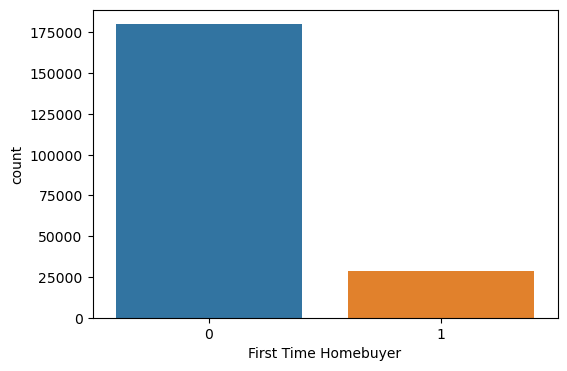

In [47]:
plt.figure(figsize=(6,4))
sns.countplot(x='aFirstTimeHomebuyer' , data=df)
plt.xlabel('First Time Homebuyer')
plt.show()

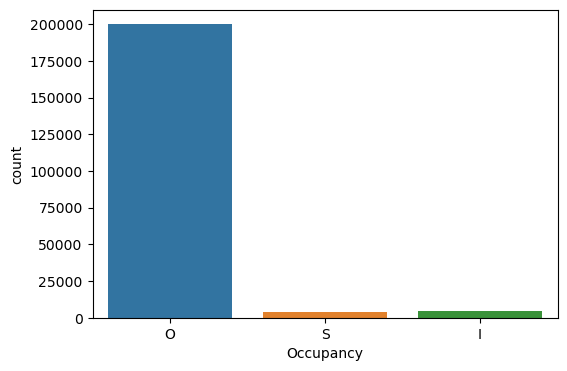

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(x='Occupancy' , data=df)
plt.xlabel('Occupancy')
plt.show()

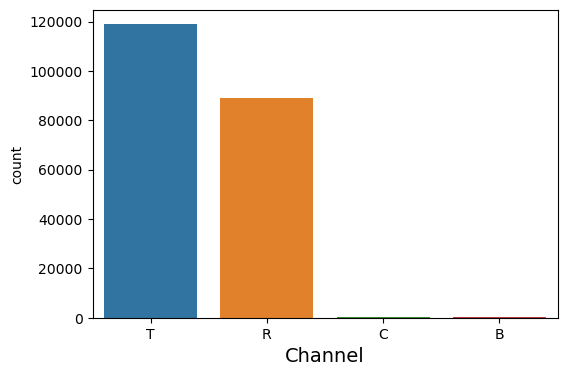

In [49]:
plt.figure(figsize=(6,4))
sns.countplot(x='Channel' , data=df)
plt.xlabel('Channel', fontsize=14)
plt.show()

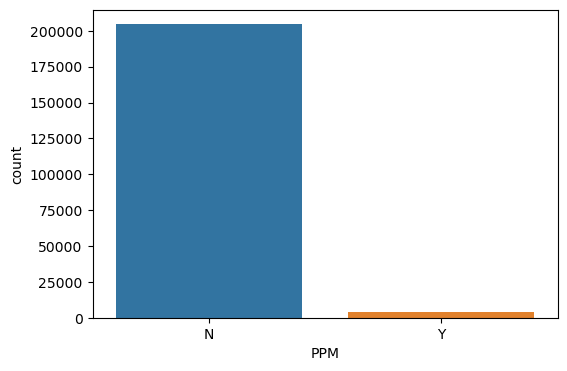

In [50]:
plt.figure(figsize=(6,4))
sns.countplot(x='PPM' , data=df)
plt.xlabel('PPM')
plt.show()

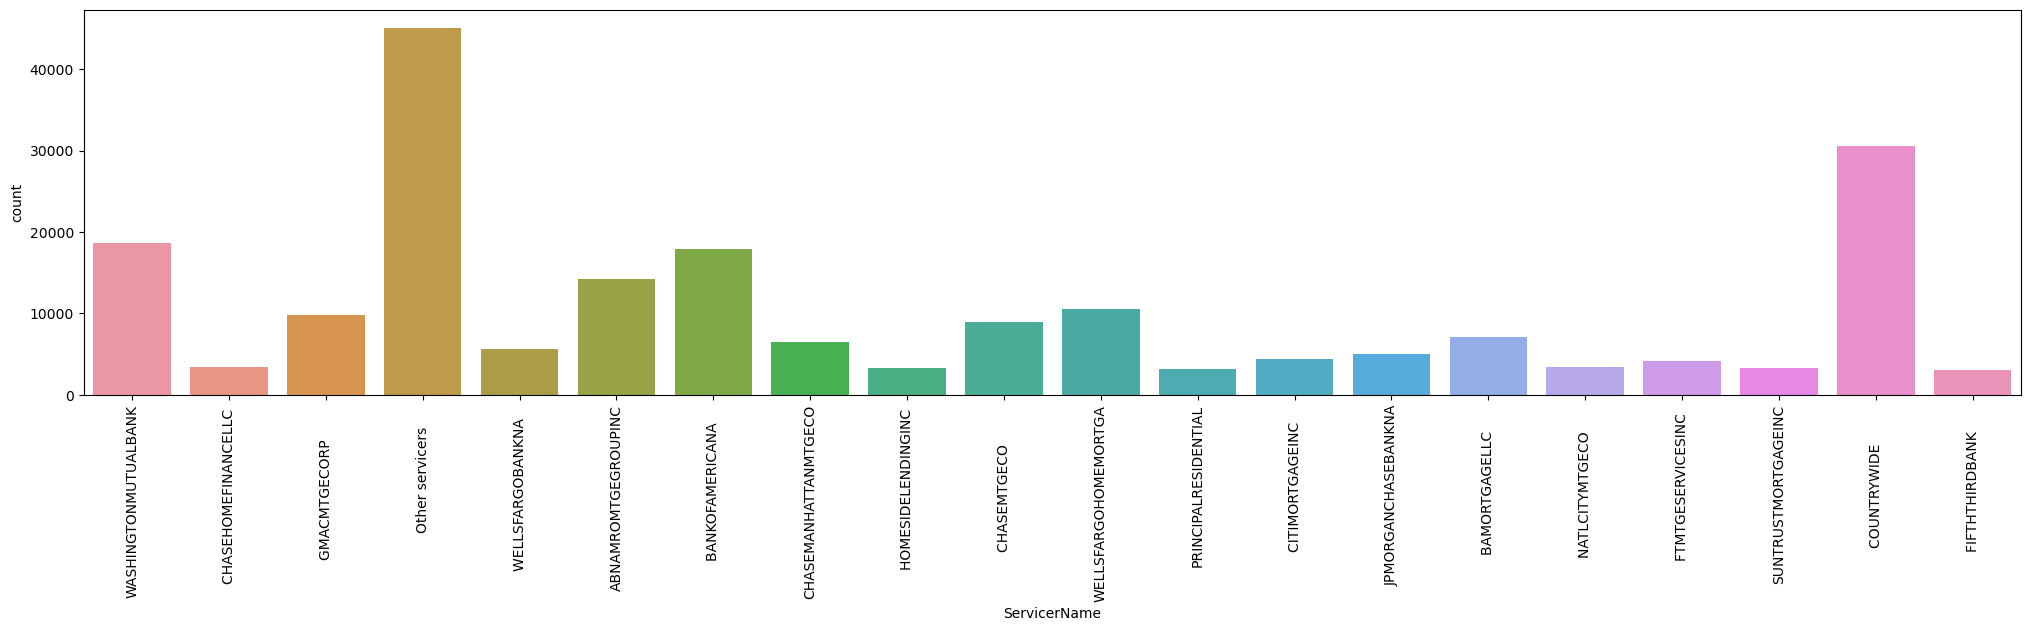

In [51]:
plt.figure(figsize=(25,5))
sns.countplot(x='ServicerName', data=df)
plt.xlabel('ServicerName')
plt.xticks(rotation='vertical')
plt.show()

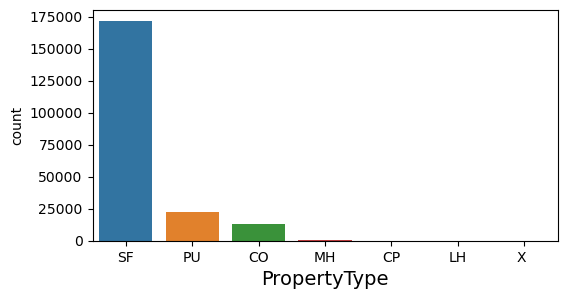

In [52]:
plt.figure(figsize=(6,3))
sns.countplot(x='PropertyType' , data=df)
plt.xlabel('PropertyType', fontsize=14)
plt.show()

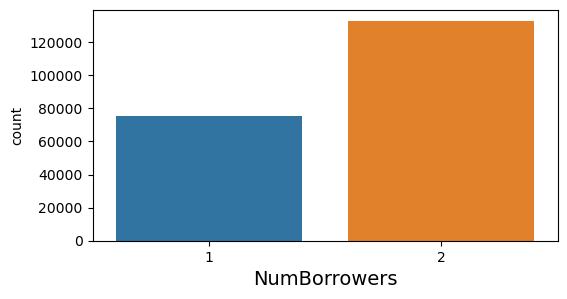

In [53]:
plt.figure(figsize=(6,3))
sns.countplot(x='NumBorrowers' , data=df)
plt.xlabel('NumBorrowers', fontsize=14)
plt.show()

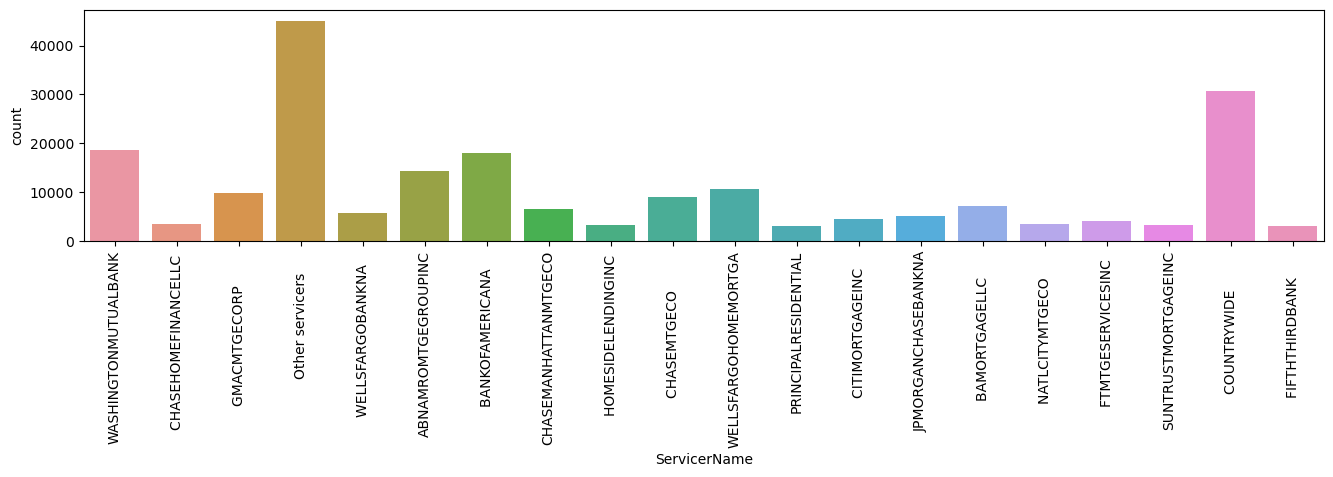

In [54]:
plt.figure(figsize=(16,3))
sns.countplot(x='ServicerName', data=df)
plt.xlabel('ServicerName')
plt.xticks(rotation='vertical')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


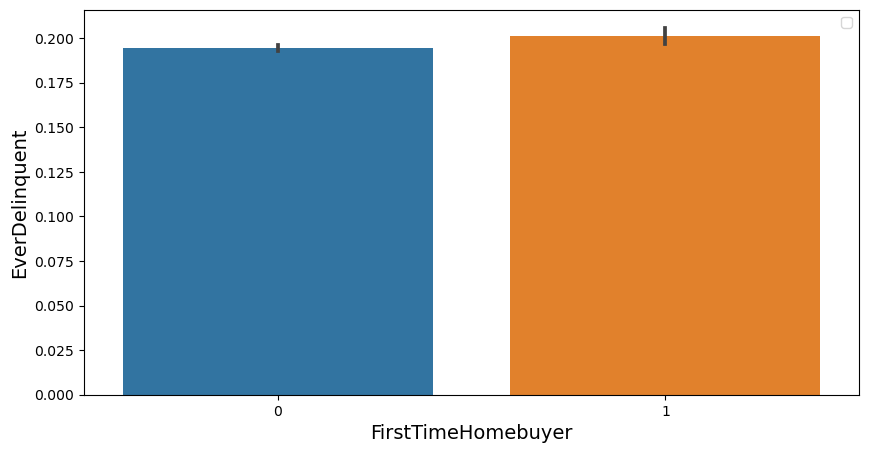

In [55]:
plt.figure(figsize=(10,5))
sns.barplot(x='aFirstTimeHomebuyer' ,y='EverDelinquent', data=df)
plt.xlabel('FirstTimeHomebuyer', fontsize=14)
plt.ylabel('EverDelinquent',fontsize=14)
plt.legend()
plt.show()

ENCODING

In [56]:
encoder=LabelEncoder()

In [57]:
df['PPM']= encoder.fit_transform(df['PPM'])
df['LoanPurpose']= encoder.fit_transform(df['LoanPurpose'])
df['PropertyState']= encoder.fit_transform(df['PropertyState'])
df['ServicerName']= encoder.fit_transform(df['ServicerName'])
df['PropertyType']= encoder.fit_transform(df['PropertyType'])
df['Channel']= encoder.fit_transform(df['Channel'])
df['SellerName']= encoder.fit_transform(df['SellerName'])
df['LTV_Range']= encoder.fit_transform(df['LTV_Range'])
df['DTI_Range']= encoder.fit_transform(df['DTI_Range'])
df['CreditRange']= encoder.fit_transform(df['CreditRange'])
df['MIP_Range']= encoder.fit_transform(df['MIP_Range'])
df['RepPayRange']= encoder.fit_transform(df['RepPayRange'])
df['Month_Difference']= encoder.fit_transform(df['Month_Difference'])

In [58]:
df_city = pd.get_dummies(df['Occupancy'],drop_first = True)

In [59]:
df=pd.concat([df,df_city],axis=1)

In [60]:
df.drop('Occupancy',axis=1,inplace=True)

In [61]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,OCLTV,DTI,OrigUPB,...,total_payment,interest_amount,monthly_income,monthly_rate,monthly_priciple amount,principal_amount_remaining,priciple_amount_paid,prepayment,O,S
0,0,1999-02-01,N,2029-01-01,16974.0,25,1,89,27,117000,...,273189.6,156189.6,2800.0,0.0056,103.66,111609.68,5390.32,15387.36,1,0
1,0,1999-02-01,N,2029-01-01,19740.0,0,1,73,17,109000,...,248022.0,139022.0,4000.0,0.0054,100.35,94549.60,14450.40,31465.20,1,0
2,0,1999-02-01,N,2029-01-01,29940.0,0,1,75,16,88000,...,208116.0,120116.0,3600.0,0.0057,76.50,82874.50,5125.50,29325.60,1,0
3,0,1999-02-01,N,2029-01-01,31084.0,0,1,76,14,160000,...,378392.4,218392.4,7500.0,0.0057,139.09,155131.85,4868.15,64773.84,1,0
4,0,1999-02-01,N,2029-01-01,35644.0,0,1,78,18,109000,...,264366.0,155366.0,4000.0,0.0059,91.25,104072.50,4927.50,30375.60,1,0


In [62]:
df.drop(['PostalCode','LoanSeqNum',"ProductType"],axis=1, inplace=True)

In [63]:
df.drop(['FirstTimeHomebuyer',"DTI","LTV",'MIP','MonthsInRepayment',"CreditScore","FirstPaymentDate","MaturityDate"],axis=1, inplace=True)

FEATURE ENGINEERING

In [65]:
x=df.drop("prepayment",axis=1)
y=df["prepayment"]
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif)

MissingDataError: exog contains inf or nans

In [66]:
X1=x.drop("OrigLoanTerm",axis=1)

In [67]:
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]

print(vif)

MissingDataError: exog contains inf or nans

In [68]:
X2=X1.drop("Month_Difference",axis=1)

In [69]:
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
print(vif)

MissingDataError: exog contains inf or nans

In [70]:
X3=X2.drop("OCLTV",axis=1)

In [71]:
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
print(vif)

MissingDataError: exog contains inf or nans

In [72]:
X4=X3.drop("OrigInterestRate",axis=1)

In [73]:
vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
print(vif)

MissingDataError: exog contains inf or nans

In [74]:
X5=X4.drop("O",axis=1)

In [75]:
vif = pd.DataFrame()
vif['Features'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
print(vif)

MissingDataError: exog contains inf or nans

In [76]:


X6=X5.drop("Units",axis=1)

In [77]:
vif = pd.DataFrame()
vif['Features'] = X6.columns
vif['VIF'] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
print(vif)

MissingDataError: exog contains inf or nans

In [78]:
X7=X6.drop("Channel",axis=1)

In [79]:
vif = pd.DataFrame()
vif['Features'] = X7.columns
vif['VIF'] = [variance_inflation_factor(X7.values, i) for i in range(X7.shape[1])]
print(vif)

MissingDataError: exog contains inf or nans

In [80]:
X8=X7.drop("PropertyType",axis=1)

In [81]:
vif = pd.DataFrame()
vif['Features'] = X8.columns
vif['VIF'] = [variance_inflation_factor(X8.values, i) for i in range(X8.shape[1])]
print(vif)

MissingDataError: exog contains inf or nans

In [82]:
X9=X8.drop("NumBorrowers",axis=1)

In [83]:
vif = pd.DataFrame()
vif['Features'] = X9.columns
vif['VIF'] = [variance_inflation_factor(X9.values, i) for i in range(X9.shape[1])]
print(vif)

MissingDataError: exog contains inf or nans

In [84]:
X10=X9.drop("MIP_Range",axis=1)

In [85]:
vif = pd.DataFrame()
vif['Features'] = X10.columns
vif['VIF'] = [variance_inflation_factor(X10.values, i) for i in range(X10.shape[1])]
print(vif)

MissingDataError: exog contains inf or nans

In [86]:
scaler = StandardScaler()
scaler_fit = scaler.fit_transform(X10)
X=pd.DataFrame(scaler_fit, columns = X10.columns)

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [87]:

X

NameError: name 'X' is not defined

In [88]:
pca = PCA()
pca.fit_transform(X)

NameError: name 'X' is not defined

In [89]:
principalComponents = pca.fit_transform(X)

NameError: name 'X' is not defined

In [90]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show();

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

<Figure size 640x480 with 0 Axes>

In [91]:
new_data = pd.DataFrame(principalComponents)

NameError: name 'principalComponents' is not defined

In [92]:
pca = PCA(n_components=12)
final_data = pca.fit_transform(new_data)
principal_Df = pd.DataFrame(data = final_data
             , columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])

NameError: name 'new_data' is not defined

In [93]:
principal_Df

NameError: name 'principal_Df' is not defined

In [94]:
X = principal_Df
Y = df["EverDelinquent"]

NameError: name 'principal_Df' is not defined

SPLITTING

In [95]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

NameError: name 'X' is not defined

MODELING

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)

In [ ]:
print(accuracy_score(Y_train,lr.predict(X_train)))

In [ ]:
print('accuracy score using logistic regression',accuracy_score(Y_test,Y_pred))


In [ ]:
print('classification report',classification_report(Y_test,Y_pred))


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)

In [ ]:
accuracy_score(Y_train,rfc.predict(X_train))

In [ ]:
print('accuracy score using random forest model',accuracy_score(Y_test, rfc.predict(X_test)))

In [ ]:
print('classification report', classification_report(Y_test, rfc.predict(X_test)))